# 개인 의료비 예측
## 링크 : [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)
## Columns
age : 수혜자의 나이  
sex : 계약자의 성별  
bmi : 체질량 지수 (몸무게(kg) / 키(m)^2), 이상적 수치(18.5~24.9)  
children : 건강보험이 적용되는 자녀의 수, 피부양자 수  
smoker : 흡연여부  
region : 수혜자의 미국내 거주지역(북동부, 남동부, 남서부, 북서부)  
charges : 건강 보험에 청구하는 개별 의료비  

1. 필요한 라이브러리 설치

In [117]:
! pip install flaml --quiet
! pip install gradio --quiet

2. 라이브러리 불러오기

In [118]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


3. 데이터셋 불러오기

In [119]:
# from google.colab import drive
# drive.mount('/content/drive')

In [120]:
# # Train 데이터 불러오기
# df = pd.read_csv(r'drive/MyDrive/Colab Notebooks/Dataset/MedicalCostPrediction.csv')

In [121]:
df = pd.read_csv(r'Dataset/MedicalCostPrediction.csv')

In [122]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [123]:
df.shape

(1338, 7)

4. 데이터 분석

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [125]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [126]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


5. 데이터 시각화

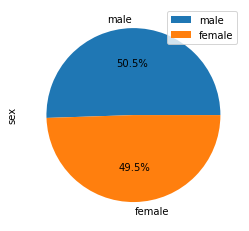

In [128]:
pd.Series(df['sex']).value_counts().plot.pie(autopct='%.1f%%', legend=True)
# colors = sns.color_palette('pastel')
# plt.pie((df['sex']).value_counts(), colors=colors, autopct='%.1f%%')
# plt.legend(df['sex'])
plt.show()

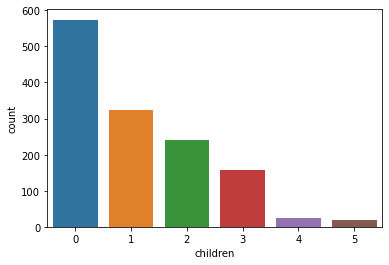

In [129]:
# pd.Series(df['children']).value_counts().plot.bar(legend=True, rot=0)
sns.countplot(x='children', data=df)
plt.show()

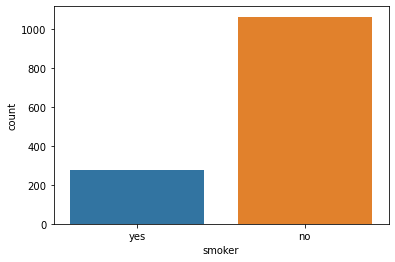

In [130]:
# pd.Series(df['smoker']).value_counts().plot.bar(rot=0)
sns.countplot(x='smoker', data=df)
plt.show()

In [131]:
# pd.Series(df['region']).value_counts()
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

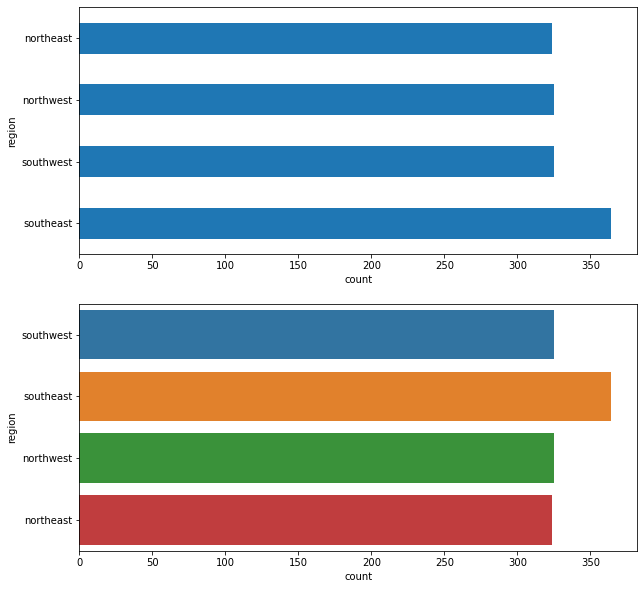

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
pd.Series(df['region'].value_counts().plot.barh(ax=axes[0]))
axes[0].set_xlabel('count')
axes[0].set_ylabel('region')
sns.countplot(y='region', data=df, ax=axes[1])
plt.show()

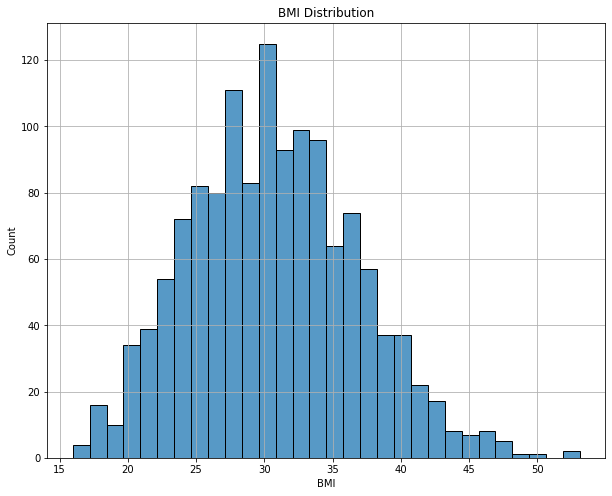

In [133]:
plt.figure(figsize=(10, 8))
# plt.hist(df['bmi'], bins=30)
# pd.Series(df['bmi']).plot.hist(bins=30)
# pd.Series(df['bmi']).plot(kind='hist', bins=30)
plt.xlabel('BMI')
plt.ylabel('Count')

sns.histplot(x='bmi', data=df, bins=30)

plt.title('BMI Distribution')
plt.grid()
plt.show()

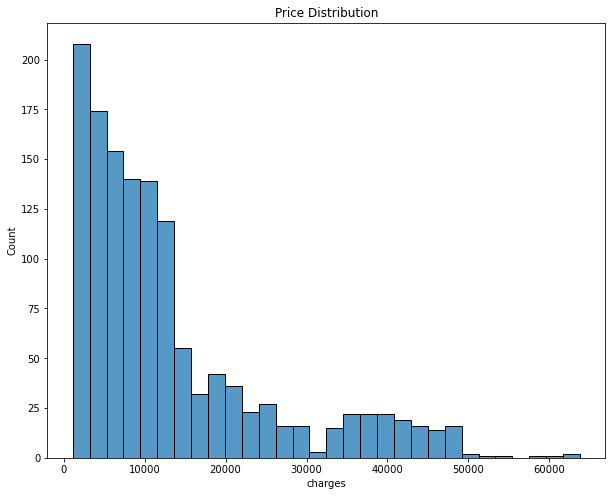

In [134]:
plt.figure(figsize=(10, 8))
# plt.hist(df['charges'], bins=30)

# pd.Series(df['charges']).plot.hist(bins=30)

# pd.Series(df['charges']).plot(kind='hist', bins=30)

plt.xlabel('charges')
plt.ylabel('Count')

sns.histplot(x='charges', data=df, bins=30)

plt.title('Price Distribution')
plt.show()

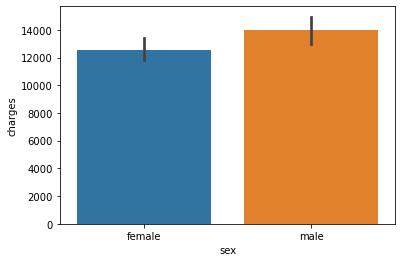

In [135]:
sns.barplot(x='sex', y='charges', data=df) # bootstrap confidence interval

# pd.Series(df.groupby('sex').mean()['charges']).plot.bar(rot=0)

# charges = df.groupby('sex').mean()['charges']
# sex = df['sex'].unique()
# sex = sorted(sex)
# plt.bar(sex, charges)

plt.show()

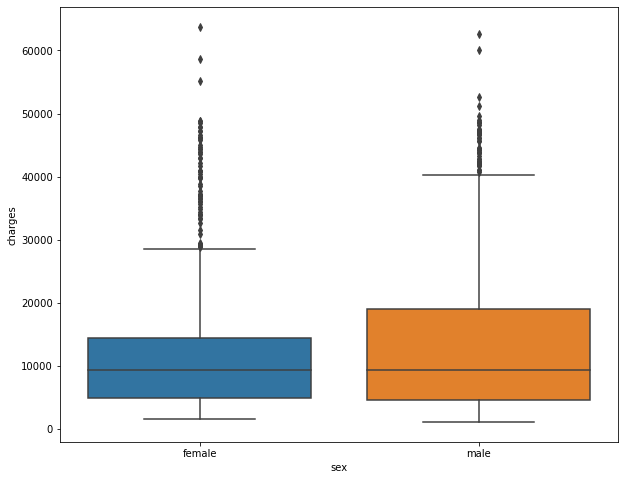

In [136]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='sex', y='charges', data=df)

# charges = [charges for sex, charges in df.groupby('sex')['charges']]
# sex = df['sex'].unique()
# sex = sorted(sex)
# plt.boxplot(charges)
# plt.xticks(np.arange(1, len(sex)+1), sex)

plt.show()

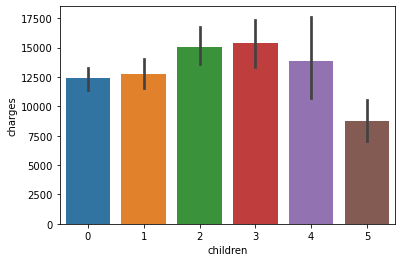

In [137]:
sns.barplot(x='children', y='charges', data=df)

# pd.Series(df.groupby('children').mean()['charges']).plot.bar(rot=0)

# pd.Series(df.groupby('children').mean()['charges']).plot(kind='bar', rot=0)
plt.show()

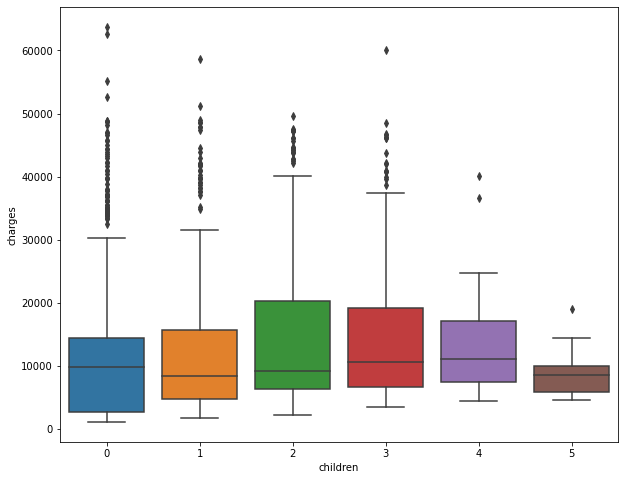

In [138]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='children', y='charges', data=df)

# charges = [charges for children, charges in df.groupby('children')['charges']]
# children = df['children'].unique()
# children = sorted(children)
# plt.boxplot(charges)
# plt.xticks(np.arange(1, len(children)+1), children)

plt.show()

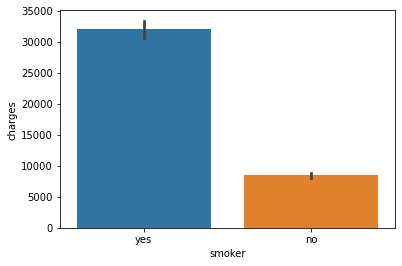

In [139]:
sns.barplot(x='smoker', y='charges', data=df)

# pd.Series(df.groupby(df['smoker']).mean()['charges']).plot.bar(rot=0)

plt.show()

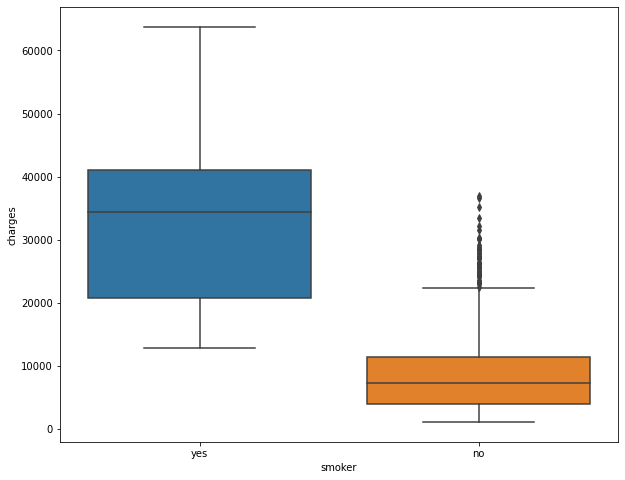

In [140]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='smoker', y='charges', data=df)

# charges = [charges for smoker, charges in df.groupby(df['smoker'])['charges']]
# smoker = df['smoker'].unique()
# smoker = sorted(smoker)
# plt.boxplot(charges)
# plt.xticks(np.arange(1, len(smoker)+1), smoker)

plt.show()

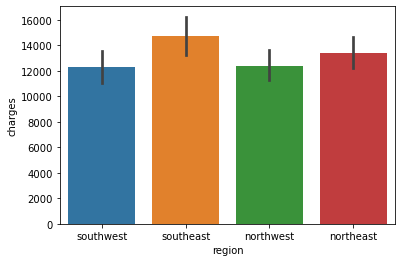

In [141]:
sns.barplot(x='region', y='charges', data=df)

# pd.Series(df.groupby('region').mean()['charges']).plot.bar(rot=0)

plt.show()

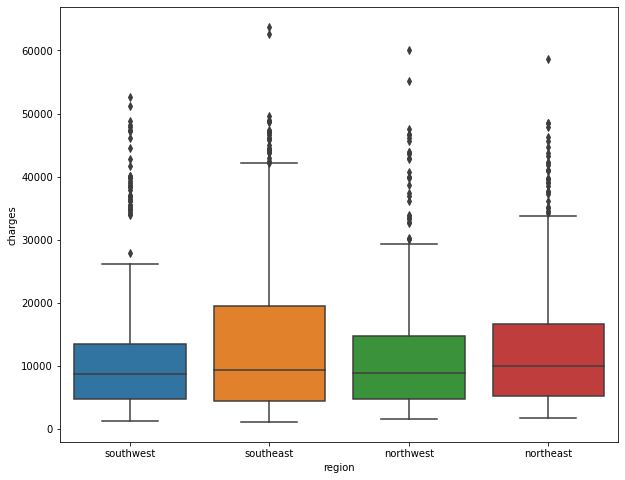

In [142]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='region', y='charges', data=df)

# charges = [charges for region, charges in df.groupby('region')['charges']]
# region = df['region'].unique()
# region = sorted(region)
# plt.boxplot(charges)
# plt.xticks(np.arange(1, len(region)+1), region)

plt.show()

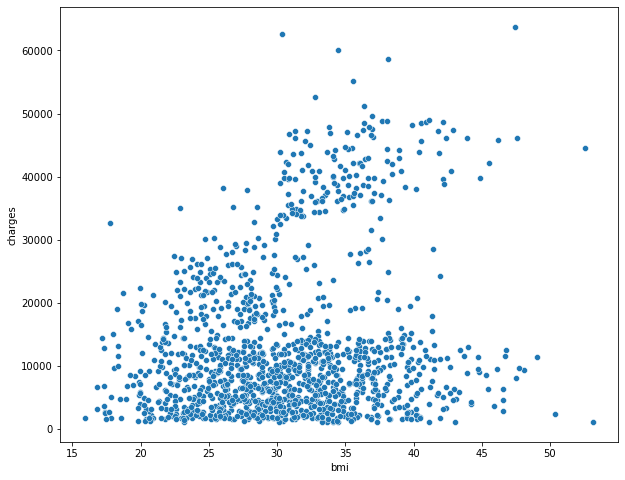

In [143]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='bmi', y='charges', data=df)
# plt.scatter(x=df['bmi'], y=df['charges'], s=20, c='red')


plt.show()

6-1. 데이터 전처리1

In [144]:
# df.head()

In [145]:
# df.replace({'sex':{'female':0, 'male':1}}, inplace=True)
# df.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
# df.replace({'region':{'northeast':0, 'northwest':1, 'southeast':2, 'southwest':3}}, inplace=True)
# df.head()

In [146]:
# X = df.drop('charges', axis=1)
# y = df['charges']
# print(X.head(), '\n')
# print(y.head())

6-2.데이터 전처리2

In [147]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
encoder = OrdinalEncoder()

In [149]:
obj_data_name = [name for name in df.columns if df[name].dtype == object]
obj_data_enc = pd.DataFrame(encoder.fit_transform(df[obj_data_name]))
obj_data_enc.columns = obj_data_name
obj_data_enc.head()

,sex,smoker,region
0,0.0,1.0,3.0
1,1.0,0.0,2.0
2,1.0,0.0,2.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0


In [150]:
pd.DataFrame(encoder.inverse_transform(obj_data_enc)).head()

,0,1,2
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [151]:
X_enc = df.drop(obj_data_name, axis=1)
X_enc = pd.concat([X_enc, obj_data_enc], axis=1)
X_enc.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0.0,1.0,3.0
1,18,33.770,1,1725.55230,1.0,0.0,2.0
2,28,33.000,3,4449.46200,1.0,0.0,2.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0


In [152]:
X = X_enc.drop('charges', axis=1)
y = df['charges']

In [153]:
print(X)

      age     bmi  children  sex  smoker  region
0      19  27.900         0  0.0     1.0     3.0
1      18  33.770         1  1.0     0.0     2.0
2      28  33.000         3  1.0     0.0     2.0
3      33  22.705         0  1.0     0.0     1.0
4      32  28.880         0  1.0     0.0     1.0
...   ...     ...       ...  ...     ...     ...
1333   50  30.970         3  1.0     0.0     1.0
1334   18  31.920         0  0.0     0.0     0.0
1335   18  36.850         0  0.0     0.0     2.0
1336   21  25.800         0  0.0     0.0     3.0
1337   61  29.070         0  0.0     1.0     1.0

[1338 rows x 6 columns]


In [154]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of X_train is: (1070, 6)
The shape of X_test is: (268, 6)
The shape of y_train is: (1070,)
The shape of y_test is: (268,)


In [156]:
print(X_train)

      age     bmi  children  sex  smoker  region
560    46  19.950         2  0.0     0.0     1.0
1285   47  24.320         0  0.0     0.0     0.0
1142   52  24.860         0  0.0     0.0     2.0
969    39  34.320         5  0.0     0.0     2.0
486    54  21.470         3  0.0     0.0     1.0
...   ...     ...       ...  ...     ...     ...
1095   18  31.350         4  0.0     0.0     0.0
1130   39  23.870         5  0.0     0.0     2.0
1294   58  25.175         0  1.0     0.0     0.0
860    37  47.600         2  0.0     1.0     3.0
1126   55  29.900         0  1.0     0.0     3.0

[1070 rows x 6 columns]


In [157]:
print(X_test)

      age     bmi  children  sex  smoker  region
764    45  25.175         2  0.0     0.0     0.0
887    36  30.020         0  0.0     0.0     1.0
890    64  26.885         0  0.0     1.0     1.0
1293   46  25.745         3  1.0     0.0     1.0
259    19  31.920         0  1.0     1.0     1.0
...   ...     ...       ...  ...     ...     ...
109    63  35.090         0  1.0     1.0     2.0
575    58  27.170         0  0.0     0.0     1.0
535    38  28.025         1  1.0     0.0     0.0
543    54  47.410         0  0.0     1.0     2.0
846    51  34.200         1  0.0     0.0     3.0

[268 rows x 6 columns]


In [158]:
print(y_train)

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64


In [159]:
print(y_test)

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64


7. 평가에 필요한 함수 작성

In [160]:
def metrics(predict, target):
    r2 = round(r2_score(predict, target), 3)
    mae = round(mean_absolute_error(predict, target), 3)
    mse = round(mean_squared_error(predict, target), 3)
    rmse = round(np.sqrt(mean_squared_error(predict, target)), 3)

    metrics_dict = {'R^2': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}
    return metrics_dict

In [161]:
def evaluate(_model, X_train, y_train, X_test, y_test):
    df = pd.DataFrame()
    for model in _model:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        train_metrics_dict = metrics(y_train_pred, y_train)
        train_metrics_df = pd.DataFrame(train_metrics_dict, index=[str(model)+' Train'])
        df = pd.concat([df, train_metrics_df])

        y_test_pred = model.predict(X_test)
        test_metrics_dict = metrics(y_test_pred, y_test)
        test_metrics_df = pd.DataFrame(test_metrics_dict, index=[str(model)+' Test'])
        df = pd.concat([df, test_metrics_df])

    return df


8. 여러가지 회귀 모델의 성능 평가

In [171]:
model_list = [DecisionTreeRegressor(), 
              RandomForestRegressor(),
              ExtraTreesRegressor(),
              BaggingRegressor(),
              AdaBoostRegressor(),
              GradientBoostingRegressor(),
              XGBRegressor(),
              LGBMRegressor()
              ]
metrics_df = evaluate(model_list, X_train, y_train, X_test, y_test)
print(metrics_df)

                                                      R^2       MAE  \
DecisionTreeRegressor() Train                       0.998    29.573   
DecisionTreeRegressor() Test                        0.757  3011.576   
RandomForestRegressor() Train                       0.973  1063.073   
RandomForestRegressor() Test                        0.855  2501.758   
ExtraTreesRegressor() Train                         0.998    29.573   
ExtraTreesRegressor() Test                          0.834  2494.112   
BaggingRegressor() Train                            0.962  1157.785   
BaggingRegressor() Test                             0.853  2447.526   
AdaBoostRegressor() Train                           0.791  3954.523   
AdaBoostRegressor() Test                            0.788  4277.240   
GradientBoostingRegressor() Train                   0.882  2101.362   
GradientBoostingRegressor() Test                    0.861  2447.167   
XGBRegressor(base_score=0.5, booster='gbtree', ...  0.992   573.485   
XGBReg

9. 모델 선정 및 하이퍼파라미터 튜닝

In [172]:
model_name = metrics_df['R^2'].iloc[1::2].idxmax()
model_name = model_name.rstrip('() Test')
model = getattr(sys.modules[__name__], model_name)()
print(model)
print(model.get_params())

GradientBoostingRegressor()
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [164]:
param_grid = [
    {'n_estimators': [100, 150, 200], 'max_features': [2, 4, 6, 8]},
    {'n_estimators': [75, 125, 175], 'max_features': [5, 7]}
]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [100, 150, 200]},
                         {'max_features': [5, 7],
                          'n_estimators': [75, 125, 175]}],
             scoring='r2')

In [165]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 75}

In [166]:
model = grid_search.best_estimator_
y_test_pred = model.predict(X_test)
metrics_df = metrics(y_test_pred, y_test)
print(metrics_df)

{'R^2': 0.864, 'MAE': 2397.171, 'MSE': 18455557.867, 'RMSE': 4295.993}


10. 데이터의 각 항목이 결과에 영향을 미치는 정도 파악

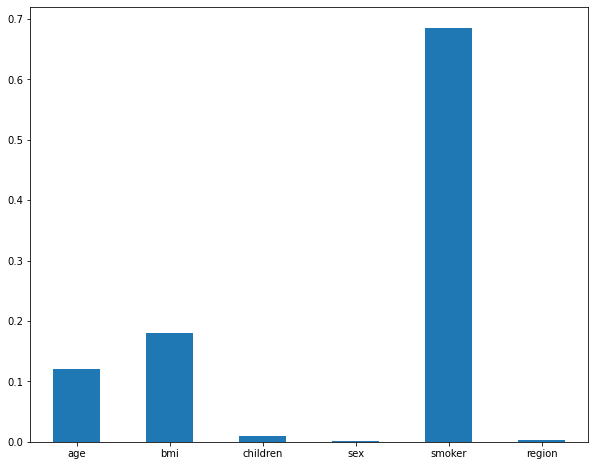

In [167]:
feature_names = X.columns.values.tolist()
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 8))
pd.Series(feature_importances, index=feature_names).plot.bar(rot=0)
plt.show()

11. 배포

In [168]:
def predict(*args):
    data = np.array([args])
    return aml.predict(data)[0]

In [169]:
number = gr.components.Number
radio = gr.components.Radio

param = {}

param['age'] = number(value=0, label="나이")
param['sex'] = radio([0, 1], value=0, label="성별(여자: 0, 남자: 1)")
param['bmi'] = number(value=X_train['bmi'].mean(), label="BMI")
param['children'] = radio([0, 1, 2, 3, 4, 5], value=0, label="자녀수")
param['smoker'] = radio([0, 1], value=0, label="흡연여부(비흡연: 0, 흡연: 1)")
param['region'] = radio([0, 1, 2, 3], value=0, label="거주지역(북동: 0, 북서: 1, 남동: 2, 남서: 3)")

param_list = [param[i] for i in param]

gr.Interface(predict, 
             param_list, "label",
             allow_flagging='never', live=True).launch(share=True)

Running on local URL:  http://127.0.0.1:7863/
Running on public URL: https://15977.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x1f027209af0>,
 'http://127.0.0.1:7863/',
 'https://15977.gradio.app')